## Machine Learning HW1

##### Problem 3

In [5]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

In [31]:
df=pd.read_csv('/Users/jinchengchao/Downloads/problem3.csv',header=None)
df.head()

,0
0,1.552381
1,1.235375
2,2.135027
3,1.494399
4,1.736105


In [19]:
def neg_loglikelihood(theta,data):
    n=data.shape[0]
    x0,gamma=theta
    loglikelihood=-n*np.log(np.pi)-n*gamma-sum(np.log(1+((data-x0)/np.exp(gamma))**2))
    return -loglikelihood

Text(0.5, 0, 'Negative Log Likelihood')

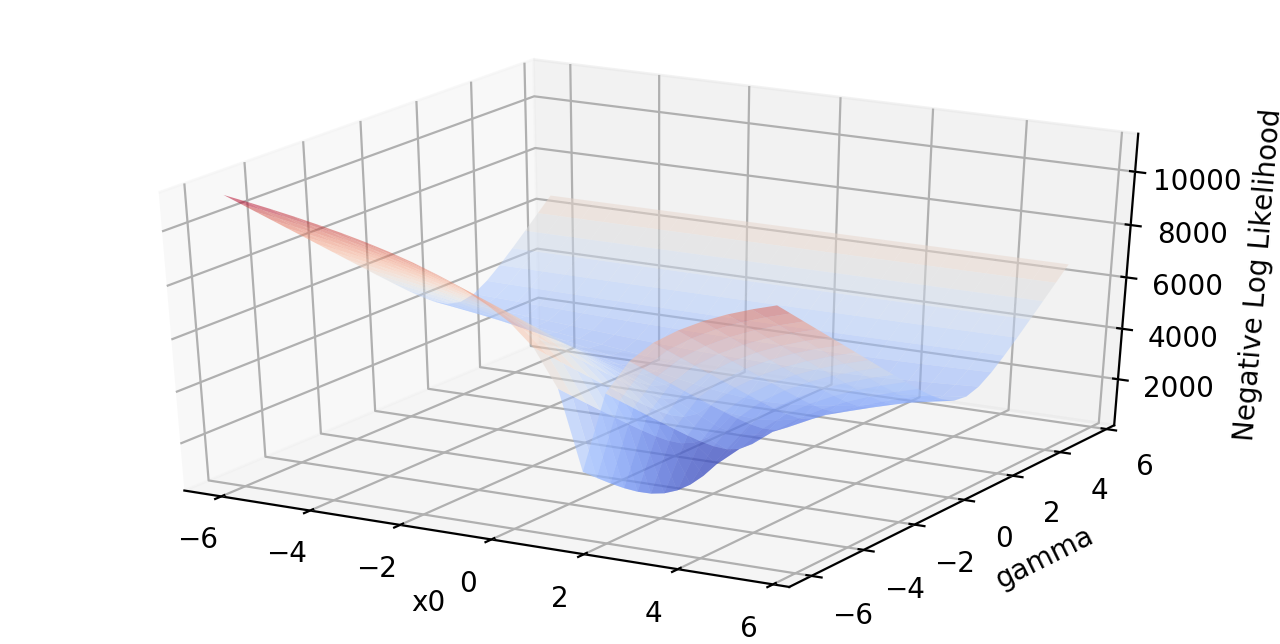

In [36]:
# Plot
fig = plt.figure(figsize=(8,4), dpi=200)
ax = fig.add_subplot(111, projection='3d')
x = np.arange(-6, 6, 0.5)
y = np.arange(-6, 6, 0.5)
X, Y = np.meshgrid(x, y)
def fun(x, y, data):
    return np.array([
    neg_loglikelihood((x_value, y_value), df[0]) for x_value, y_value in zip(x,y) ])
    
zs = np.array(fun(np.ravel(X), np.ravel(Y), df[0]))
Z = zs.reshape(X.shape)

ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, alpha=0.5)

ax.set_xlabel('x0')
ax.set_ylabel('gamma')
ax.set_zlabel('Negative Log Likelihood')


In [46]:
def neg_loglikelihood_grad(theta,data):
    n=data.shape[0]
    x0,gamma=theta
    grad=np.zeros((2,))
    grad[0]=sum(2*((data-x0)/np.exp(2*gamma))/(1+((data-x0)/np.exp(gamma))**2))
    grad[1]=-n+sum(2*((data-x0)/np.exp(gamma))**2/(1+((data-x0)/np.exp(gamma))**2))
    return -grad

In [58]:
# Initial iterate: the first is mu, the second is sigma.
theta = np.array([1.0, 2.0])

# Keep track of the function values .
fval_history = []
# Keep track of the iterate history .
x0_history = []
gamma_history = []
def objective_function(theta,data):
    fval = neg_loglikelihood(theta,data) 
    global fval_history
    fval_history += [ fval ]
    global x0_history
    global gamma_history
    x0_history.append(theta[0])
    gamma_history.append(theta[1])
    return fval
def objective_gradient(theta,data): 
    gradient = neg_loglikelihood_grad(theta,data)
    return gradient


res = minimize(
    objective_function, theta, method="BFGS",
    jac=objective_gradient, args=(df[0],))
print(res)

      fun: 358.95391879085855
 hess_inv: array([[ 2.31874754e-05, -4.55232616e-08],
       [-4.55232616e-08,  2.09192045e-03]])
      jac: array([ 7.68706291e-06, -3.51646236e-07])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 11
     njev: 18
   status: 0
  success: True
        x: array([ 1.49348727, -2.21055569])


In [59]:
fval_history

[3190.137537937193,
 2262.3990752453556,
 2528.0981013158025,
 2667.3331046707926,
 1310.004228759784,
 1069.480342845397,
 1080.3234043049852,
 1020.7533762843727,
 838.2156441769148,
 573.8031188295994,
 622.0286505873357,
 392.1683780232868,
 372.24055299312226,
 359.3866104989663,
 358.96406460466983,
 358.95393231458456,
 358.95391879095973,
 358.95391879085855]

In [60]:
log=pd.DataFrame(list(zip(x0_history,gamma_history)),columns=['x0','gamma'])
print(log)

          x0     gamma
0   1.000000  2.000000
1   1.018138  0.990163
2   1.090691 -3.049186
3   1.688431 -4.438546
4   1.405887 -3.781813
5   1.457236 -3.901167
6   1.508240 -4.019717
7   1.480878 -3.956119
8   1.281144 -1.699449
9   1.386312 -1.512086
10  1.615170 -2.177128
11  1.499314 -1.840460
12  1.516786 -2.098492
13  1.489031 -2.212731
14  1.493911 -2.205426
15  1.493498 -2.210341
16  1.493487 -2.210556
17  1.493487 -2.210556


##### Problem 4

In [48]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler

In [49]:
boston=load_boston()
scaler=StandardScaler()
df_b=pd.DataFrame(scaler.fit_transform(boston.data),columns=boston.feature_names)
df_b['target']=(boston.target-min(boston.target))/(max(boston.target)-min(boston.target))
df_b.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,0.422222
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,0.368889
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,0.660000
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,0.631111
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,0.693333


In [50]:
def l_function(x,y,w,b,n,lamda):
    l = 1/n*sum((b + np.dot(w,x) - y)**2) + lamda*sum(w**2)
    return l

def GDRidge(data,T,rate,lamda,l_b=False):
    x = np.transpose(np.array(data)[:,:-1])
    y = np.transpose(np.array(data)[:,-1])
    w = np.transpose(np.zeros(data.shape[1]-1))
    b = 0
    n = data.shape[0]
    l_f = []
    two_norm = []
    for i in range(T):
        if l_b:
            l_f.append(l_function(x,y,w,b,n,lamda))
            two_norm.append(np.sqrt(np.dot(w,w)))  
        b_new = b + rate/n*2*sum(y-b-np.dot(w,x))
        w_new = w + rate/n*2*np.dot(x,(y-b-np.dot(w,x))) - rate*2*lamda*w
        b = b_new
        w = w_new  
    return w,b,l_f,two_norm

In [51]:
w,b,l_f,two_norm = GDRidge(df_b,100,0.01,0.1,l_b = True)

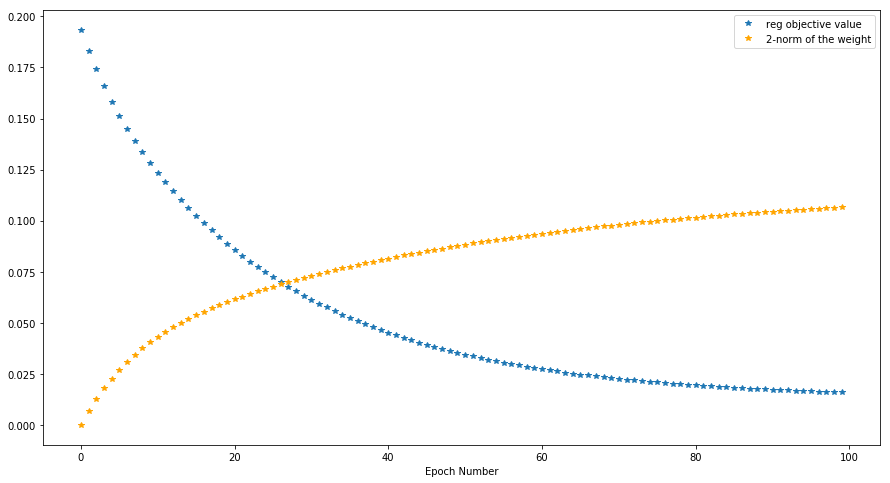

In [52]:
plt.figure(figsize=(15,8))
plt.plot(l_f,marker='*',linestyle='',label='reg objective value')
plt.plot(two_norm,marker='*',linestyle='',c='orange',label='2-norm of the weight')
plt.xlabel('Epoch Number')
plt.legend()

In [53]:
params=[10,1,0.1,0.01,0.001]
w_new=[]
b_new=[]
for par in params:
    w,b,l_f,two_norm = GDRidge(df_b,100,0.01,par)
    w_new.append(w)
    b_new.append(b)

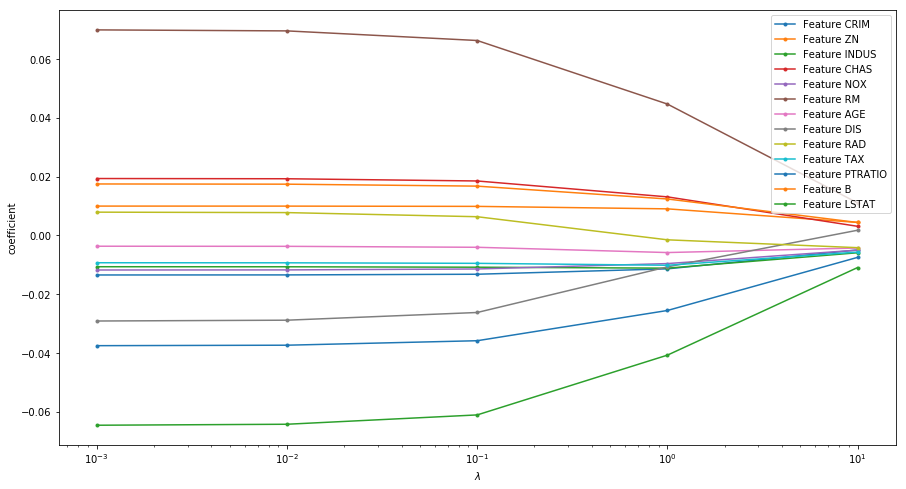

In [54]:
plt.figure(figsize = (15,8))
for fea in range(df_b.shape[1]-1):
    plt.plot(params,np.transpose(w_new)[fea],marker = 'o', ms = 3, label = 'Feature {}'.format(df_b.columns[fea]))

plt.xlabel('$\lambda$')
plt.ylabel('coefficient')
plt.xscale('log')
plt.legend();